<a href="https://colab.research.google.com/github/rr4323/data_scientist_mastry/blob/main/anime_recommendation/anime_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Download the dataset from "https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data", load it into a Python environment, perform EDA and visualizations, check distributions/skewness and apply transformations if needed, and create a content-based recommender system.

## Download and load data

### Subtask:
Download the dataset from the provided Kaggle link and load it into a pandas DataFrame.


**Reasoning**:
The subtask is to download the dataset and load it into a pandas DataFrame. Since I cannot directly download from Kaggle, I will assume the dataset has been downloaded and placed in a known location, then load the relevant CSV files into pandas DataFrames.



In [ ]:
%pip install opendatasets


In [ ]:
import pandas as pd
import opendatasets as od

# Download the dataset using opendatasets
od.download("https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rr4323
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database


100%|██████████| 25.0M/25.0M [00:00<00:00, 1.03GB/s]

In [ ]:
print("Please download the dataset from https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data manually.")
print("Upload the `anime.csv` and `rating.csv` files to the current environment, preferably into a directory named `data`.")

import os
import pandas as pd

# Assuming the dataset is downloaded and extracted in the '/data' directory
# Check if the files exist before loading
anime_path = '/content/anime-recommendations-database/anime.csv'
rating_path = '/content/anime-recommendations-database/rating.csv'

try:
    if os.path.exists(anime_path) and os.path.exists(rating_path):
        anime_df = pd.read_csv(anime_path)
        rating_df = pd.read_csv(rating_path)
        print("Anime and Rating DataFrames loaded successfully.")
        print("Anime DataFrame head:")
        display(anime_df.head())
        print("\nRating DataFrame head:")
        display(rating_df.head())
    else:
        print("Error: anime.csv or rating.csv not found in the '/data' directory.")
        print("Please ensure the files are downloaded and placed in the correct directory.")
        anime_df = None
        rating_df = None
except FileNotFoundError:
    print("Error: File not found. Please ensure the files are downloaded and placed in the correct directory.")
    anime_df = None
    rating_df = None
except Exception as e:
    print(f"An error occurred: {e}")
    anime_df = None
    rating_df = None

Please download the dataset from https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data manually.
Upload the `anime.csv` and `rating.csv` files to the current environment, preferably into a directory named `data`.
Anime and Rating DataFrames loaded successfully.
Anime DataFrame head:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



Rating DataFrame head:


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the data, including checking for missing values, data types, and summary statistics.


**Reasoning**:
Load the data into pandas DataFrames and display the first few rows, data types, missing values, and descriptive statistics as requested in the instructions.



In [ ]:
import pandas as pd
import os



try:
    if os.path.exists(anime_path) and os.path.exists(rating_path):
        anime_df = pd.read_csv(anime_path)
        rating_df = pd.read_csv(rating_path)
        print("Anime and Rating DataFrames loaded successfully.")

        # 1. Display the first few rows
        print("\nAnime DataFrame head:")
        display(anime_df.head())
        print("\nRating DataFrame head:")
        display(rating_df.head())

        # 2. Print data types
        print("\nAnime DataFrame info:")
        anime_df.info()
        print("\nRating DataFrame info:")
        rating_df.info()

        # 3. Check for missing values
        print("\nMissing values in Anime DataFrame:")
        display(anime_df.isnull().sum())
        print("\nMissing values in Rating DataFrame:")
        display(rating_df.isnull().sum())

        # 4. Display descriptive statistics
        print("\nDescriptive statistics for Anime DataFrame:")
        display(anime_df.describe())
        print("\nDescriptive statistics for Rating DataFrame:")
        display(rating_df.describe())

        # 5. Explore unique values for categorical columns in anime_df
        print("\nUnique values and counts for 'type' in Anime DataFrame:")
        display(anime_df['type'].value_counts())
        print("\nUnique values and counts for 'genre' in Anime DataFrame (first 10):")
        # Genre column contains multiple genres in one string, splitting and counting is more complex
        # For initial EDA, let's just show the value counts of the raw string
        display(anime_df['genre'].value_counts().head(10))


    else:
        print("Error: anime.csv or rating.csv not found in the '/data' directory.")
        print("Please ensure the files are downloaded and placed in the correct directory.")
        anime_df = None
        rating_df = None
except FileNotFoundError:
    print("Error: File not found. Please ensure the files are downloaded and placed in the correct directory.")
    anime_df = None
    rating_df = None
except Exception as e:
    print(f"An error occurred: {e}")
    anime_df = None
    rating_df = None

Anime and Rating DataFrames loaded successfully.

Anime DataFrame head:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



Rating DataFrame head:


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1



Anime DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB

Rating DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB

Missing values in Anime DataFrame:


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0



Missing values in Rating DataFrame:


,0
user_id,0
anime_id,0
rating,0



Descriptive statistics for Anime DataFrame:


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06



Descriptive statistics for Rating DataFrame:


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01



Unique values and counts for 'type' in Anime DataFrame:


,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488



Unique values and counts for 'genre' in Anime DataFrame (first 10):


,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
Dementia,137
"Fantasy, Kids",128
Fantasy,114
"Comedy, Kids",112


## Visualize data

### Subtask:
Create visualizations to explore the distributions of key variables and identify potential outliers or patterns.


**Reasoning**:
Load the data into pandas DataFrames and then create the requested visualizations to explore distributions and identify patterns.



Anime and Rating DataFrames loaded successfully.


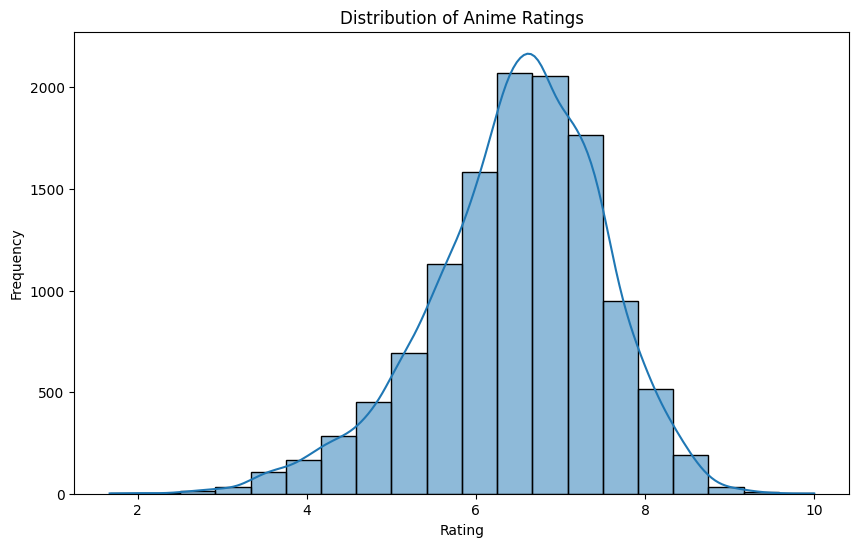

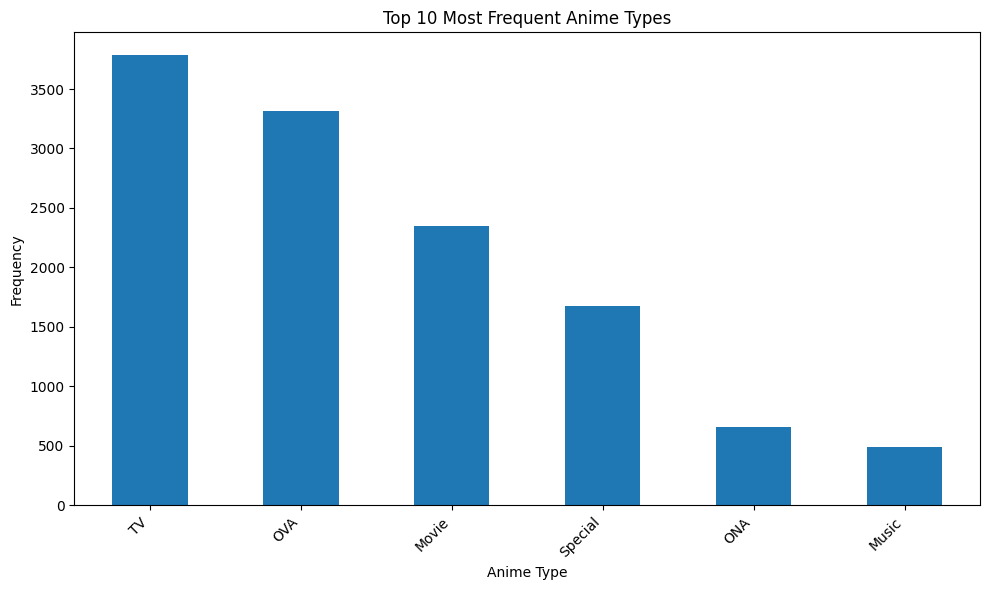

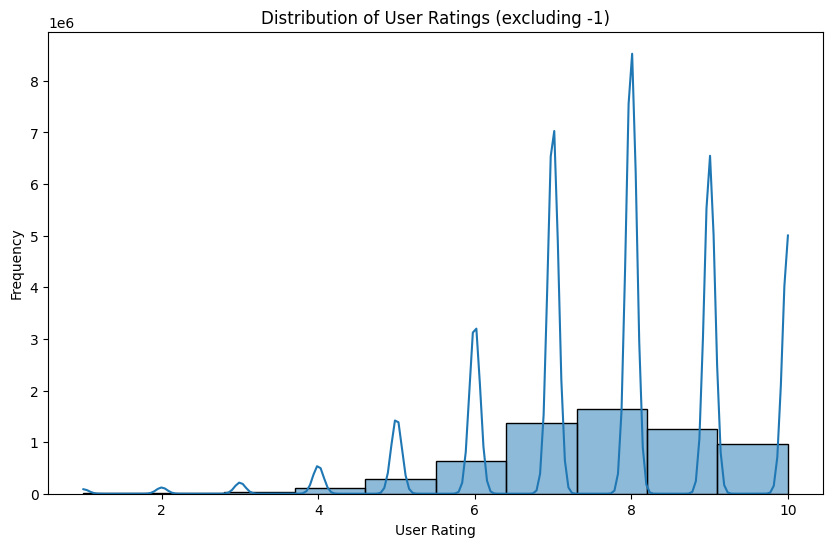

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


try:
    if os.path.exists(anime_path) and os.path.exists(rating_path):
        anime_df = pd.read_csv(anime_path)
        rating_df = pd.read_csv(rating_path)
        print("Anime and Rating DataFrames loaded successfully.")

        # 1. Create a histogram of the 'rating' column in the anime_df DataFrame
        plt.figure(figsize=(10, 6))
        sns.histplot(anime_df['rating'], bins=20, kde=True)
        plt.title('Distribution of Anime Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()

        # 2. Create a bar plot of the top 10 most frequent anime types in the anime_df DataFrame
        plt.figure(figsize=(10, 6))
        anime_df['type'].value_counts().head(10).plot(kind='bar')
        plt.title('Top 10 Most Frequent Anime Types')
        plt.xlabel('Anime Type')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 3. Create a histogram of the 'rating' column in the rating_df DataFrame
        # Note: The rating_df 'rating' column contains -1 for unrated, so we should handle this.
        plt.figure(figsize=(10, 6))
        sns.histplot(rating_df[rating_df['rating'] != -1]['rating'], bins=10, kde=True)
        plt.title('Distribution of User Ratings (excluding -1)')
        plt.xlabel('User Rating')
        plt.ylabel('Frequency')
        plt.show()


    else:
        print("Error: anime.csv or rating.csv not found in the '/data' directory.")
        print("Please ensure the files are downloaded and placed in the correct directory.")
        anime_df = None
        rating_df = None
except FileNotFoundError:
    print("Error: File not found. Please ensure the files are downloaded and placed in the correct directory.")
    anime_df = None
    rating_df = None
except Exception as e:
    print(f"An error occurred: {e}")
    anime_df = None
    rating_df = None

## Data preprocessing for recommender system

### Subtask:
Prepare the data for building a content-based recommender system. This may involve selecting relevant features, handling categorical data, and creating a suitable representation of the anime content (e.g., using TF-IDF).


**Reasoning**:
I need to perform the first step of the subtask, which is merging the `anime_df` and `rating_df` DataFrames on the 'anime_id' column. I will also load the dataframes first as it was not loaded in the previous step.



In [ ]:
anime_fulldata=pd.merge(anime_df,rating_df,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


Top 10 anime based on rating


/tmp/ipython-input-626985361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
/tmp/ipython-input-626985361.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


Text(0, 0.5, 'User Rating count')

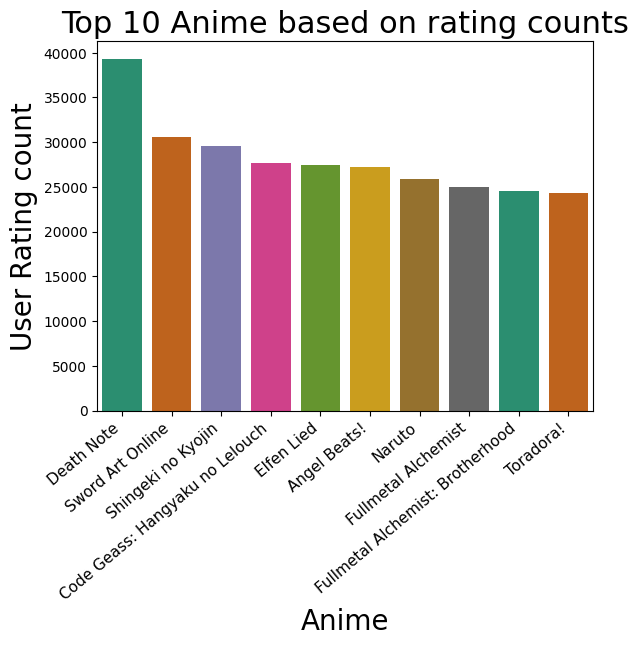

In [ ]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('User Rating count', fontsize = 20)

Top 10 anime based on community

In [ ]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title",
                     keep = 'first', inplace = True)

/tmp/ipython-input-1432143308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
/tmp/ipython-input-1432143308.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


Text(0, 0.5, 'Community Size')

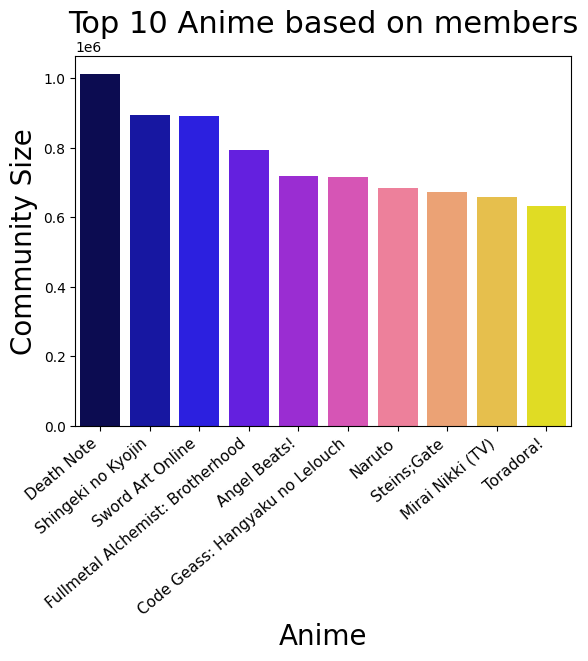

In [ ]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('Community Size', fontsize = 20)


# Handle Nan value

First we have to take care of the NaN values, as this revolves around ratings, a user who hasn't given any ratings has added no value to the engine. So let's drop and crush those NaN values

In [ ]:
import numpy as np


anime_fulldata["user_rating"].replace({-1: np.nan}, inplace=True)
anime_fulldata.head()



/tmp/ipython-input-4188962254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_fulldata["user_rating"].replace({-1: np.nan}, inplace=True)


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [ ]:
merged_df = anime_fulldata.dropna(axis = 0, how ='any')
merged_df.isnull().sum()

,0
anime_id,0
anime_title,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


There are users who has rated only once, even if they have rated it 5, it can't be considered a valuable record for recommendation. So I have considered minimum 200 ratings by the user as threshold value. You can play around changing the threshold value to get better results, but this worked fine.

In [ ]:
counts = anime_fulldata['user_id'].value_counts()
print(counts)

anime_fulldata = anime_fulldata[anime_fulldata['user_id'].isin(counts[counts >= 200].index)]

user_id
48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
44792        1
2219         1
8022         1
55861        1
6480         1
Name: count, Length: 73515, dtype: int64


In [ ]:
anime_fulldata = anime_fulldata.dropna(subset=['user_rating'])
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
14,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,784,9.0


# Cleaning anime title

In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text
anime_fulldata['anime_title'] = anime_fulldata['anime_title'].apply(text_cleaning)


In [ ]:
anime_fulldata.shape

(3360003, 9)

In [ ]:
anime_fulldata.head(10)


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
14,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,784,9.0
15,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,786,10.0
17,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,894,9.0
21,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,937,10.0
22,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,979,10.0
23,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,996,7.0


In [ ]:
# Create a new DataFrame with unique anime titles and genres
anime_content_df = anime_fulldata[['anime_id', 'anime_title', 'genre', 'rating']].drop_duplicates(subset=['anime_id'])

# Print the shape of the new DataFrame
print("Shape of anime_content_df:", anime_content_df.shape)

# Display the head of the new DataFrame
print("\nAnime Content DataFrame head:")
display(anime_content_df.head())

Shape of anime_content_df: (9838, 4)

Anime Content DataFrame head:


,anime_id,anime_title,genre,rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37
2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25
28159,9253,Steins;Gate,"Sci-Fi, Thriller",9.17
47442,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",9.16


## Build content-based recommender system

### Subtask:
Implement a content-based recommender system based on the processed data. This typically involves calculating similarity between anime items based on their content features.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string in the anime_content_df DataFrame
anime_content_df['genre'] = anime_content_df['genre'].fillna('')
genres_str = anime_content_df['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [ ]:
tfv_matrix.shape

(9838, 1477)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Create a reverse mapping of indices and anime titles
indices = pd.Series(anime_content_df.index, index=anime_content_df['anime_title']).drop_duplicates()

In [ ]:
print(indices)

anime_title
Kimi no Na wa.                                              2
Fullmetal Alchemist: Brotherhood                         2203
Gintama°                                                26774
Steins;Gate                                             28159
Gintama                                                 47442
                                                       ...   
The Satisfaction                                      7813706
Toushindai My Lover: Minami tai Mecha-Minami          7813710
Under World                                           7813716
Violence Gekiga David no Hoshi                        7813720
Violence Gekiga Shin David no Hoshi: Inma Densetsu    7813724
Length: 9838, dtype: int64


In [ ]:
def give_rec(title, sig=sig):
    # Check if the title exists in the index
    if title not in indices:
        print(f"Anime title '{title}' not found in the database. Please check the spelling or try a different title.")
        return None

    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies (excluding the input anime itself)
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_content_df['anime_title'].iloc[anime_indices].values,
                                 'Rating': anime_content_df['rating'].iloc[anime_indices].values})

In [ ]:
give_rec('Fullmetal Alchemist: Brotherhood')

,Anime name,Rating
0,Heart Cocktail,6.36
1,Angel Heart,7.38
2,Aki-Sora,6.32
3,30-sai no Hoken Taiiku,6.84
4,30-sai no Hoken Taiiku Specials,6.31
5,Cinderella Express,6.06
6,Nana to Kaoru,5.79
7,Golden Time,7.92
8,Arakawa Under the Bridge x Bridge,7.85
9,Arakawa Under the Bridge,7.71


## Summary:

### Data Analysis Key Findings

* The dataset contains information about anime titles, genres, types, episodes, ratings, members, and user ratings.
* Initial EDA revealed missing values in the 'genre', 'type', and 'rating' columns of the anime data, and '-1' values in the user ratings which were treated as missing.
* Visualizations showed the distribution of anime ratings and the popularity of different anime types.
* Data preprocessing involved handling missing values by dropping rows with NaN user ratings and filtering users with less than 200 ratings to focus on more active users.
* Text cleaning was performed on anime titles to remove unwanted characters.
* A new DataFrame (`anime_content_df`) was created with unique anime titles and relevant content features (genre and rating) for building the content-based recommender.

### Recommender System

* A content-based recommender system was built using the TF-IDF vectorizer on the anime genres to create a representation of the anime content.
* The sigmoid kernel was used to calculate the similarity between anime based on their genre vectors.
* A function `give_rec` was implemented to recommend similar anime based on a given anime title using the calculated similarity scores.

### Insights or Next Steps

* The built recommender system provides recommendations based on the genre similarity of anime.
* The system can be further improved by incorporating other content features like anime type, episodes, or even descriptions if available.
* A next step could be to evaluate the performance of this content-based recommender system using appropriate metrics if evaluation data or a framework for it is available.
* Exploring other types of recommender systems, such as collaborative filtering, could also be a valuable next step to compare performance and potentially build a hybrid recommender system.